Load Modules


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Preapre / Collect Data

In [ ]:
import os
path = os.listdir('/content/drive/MyDrive/BD Project/brain_tumor/Training')
classes = {'no_tumor':0 , 'pituitary_tumor':1 }

In [ ]:
import cv2
X=[]
Y=[]
for cls in classes:
  pth='/content/drive/MyDrive/BD Project/brain_tumor/Training/'+cls
  for j in os.listdir(pth):
    img = cv2.imread(pth+'/'+j ,0)
    img = cv2.resize(img, (200,200))
    X.append(img)
    Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
X= np.array(X)
Y= np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [ ]:
X.shape

(1222, 200, 200)

In [ ]:
Y.shape

(1222,)

Visualize Data

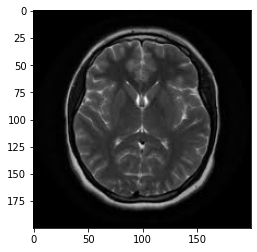

In [ ]:
plt.imshow(X[0], cmap='gray')

Prepare Data


In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

Split Data

In [ ]:
xtrain, xtest, ytrain, ytest =train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


Feature Selection : PCA

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test =xtest

(977, 40000) (245, 40000)


In [ ]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.nfeatures_)

 Training Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lg= LogisticRegression(C = 0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(pca_train, ytrain)

KNeighborsClassifier()

In [ ]:
dt=  DecisionTreeClassifier()
dt.fit(pca_train, ytrain)

DecisionTreeClassifier()

Accuracy Evaluation 

In [ ]:
print('Training Accuracy Score Of Logistic Regression:', lg.score(pca_train ,ytrain))
print('Testing Accuracy Score Of Logistic Regression:', lg.score(pca_test ,ytest)) 


Training Accuracy Score Of Logistic Regression: 1.0
Testing Accuracy Score Of Logistic Regression: 0.9469387755102041


In [ ]:
print('Training Accuracy Score of SVC:', sv.score(pca_train ,ytrain))
print('Testing Accuracy Score of SVC:', sv.score(pca_test ,ytest)) 


Training Accuracy Score of SVC: 0.9907881269191402
Testing Accuracy Score of SVC: 0.9551020408163265


In [ ]:
print('Training Accuracy Score of KNN:', knn.score(pca_train ,ytrain))
print('Testing Accuracy Score of KNN:', knn.score(pca_test ,ytest)) 

Training Accuracy Score of KNN: 0.9539406345957011
Testing Accuracy Score of KNN: 0.9387755102040817


In [ ]:
print('Training Accuracy Score of Decision Tree: ', dt.score(pca_train ,ytrain))
print('Testing Score of Decision Tree:', dt.score(pca_test ,ytest)) 

Training Accuracy Score of Decision Tree:  1.0
Testing Score of Decision Tree: 0.9591836734693877


Prediction

Training Model

In [ ]:
dec ={0:'Benign Tumor', 1:'Malignant Tumor'}

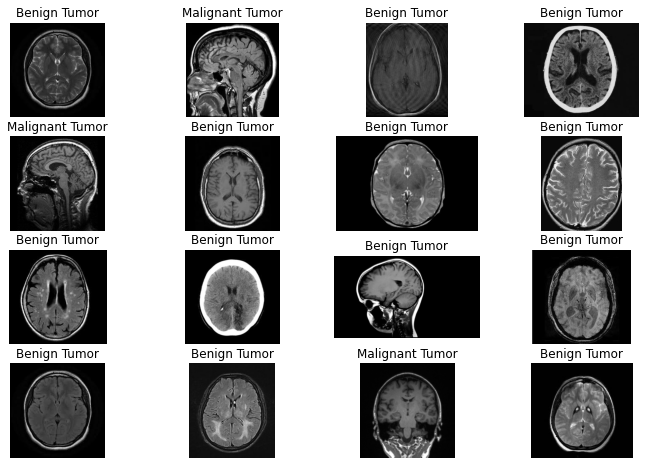

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/BD Project/brain_tumor/Training/')
c=1
for i in os.listdir('/content/drive/MyDrive/BD Project/brain_tumor/Training/no_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/BD Project/brain_tumor/Training/no_tumor/'+i,0)
  img1 = cv2.resize(img,(200,200))
  img1 = img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1

Test Model

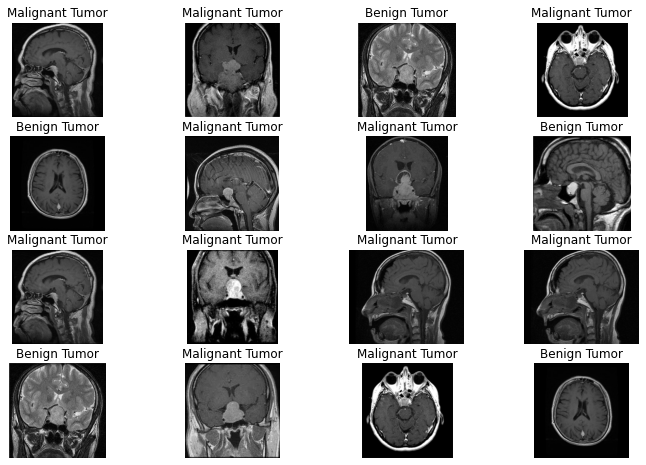

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/drive/MyDrive/BD Project/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/BD Project/brain_tumor/Testing/pituitary_tumor/')[:16]:
  plt.subplot(4,4,c)

  img=cv2.imread('/content/drive/MyDrive/BD Project/brain_tumor/Testing/pituitary_tumor/'+i,0)
  img1 = cv2.resize(img,(200,200))
  img1 = img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  c+=1